# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [60]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [61]:
sinasc_2 = sinasc_raw[[
    'munResLat',
    'munResNome',
    'SEMAGESTAC',
    'CONSPRENAT',
    'ESCMAE',
    'IDADEMAE',
    'DTNASC',
    'PESO',
    'munResArea',
    'munResAlt'
]]

sinasc_2.head(5)

,munResLat,munResNome,SEMAGESTAC,CONSPRENAT,ESCMAE,IDADEMAE,DTNASC,PESO,munResArea,munResAlt
0,-11.93554,Alta Floresta D'Oeste,39.0,8.0,8 a 11 anos,19,2019-02-19,3685,7067.025,338.0
1,-11.93554,Alta Floresta D'Oeste,38.0,10.0,8 a 11 anos,29,2019-02-21,3055,7067.025,338.0
2,-11.93554,Alta Floresta D'Oeste,40.0,8.0,8 a 11 anos,37,2019-02-25,3460,7067.025,338.0
3,-12.13178,Alto Alegre dos Parecis,38.0,6.0,12 anos ou mais,30,2019-03-20,2982,3958.273,397.0
4,-11.93554,Alta Floresta D'Oeste,38.0,8.0,8 a 11 anos,30,2019-03-23,3310,7067.025,338.0


Criei duas variáveis para iterar num loop `for` (dois no caso), e também um dicionário para adicionar os elementos para separação.

In [62]:
mun_lat_maior = sinasc_2.loc[sinasc_2['munResLat'] > -10.5]
mun_lat_menor = sinasc_2.loc[sinasc_2['munResLat'] < -10.5]
mun_lat = {}

Com os loops abaixo agreguei cada nome de munícipio com a categoria que pertence: `Maior que -10.5` ou `Menor que -10.5`

In [63]:
for i in mun_lat_maior['munResNome'].unique():
    mun_lat[i] = 'Maior que -10.5'
for i in mun_lat_menor['munResNome'].unique():
    mun_lat[i] = 'Menor que -10.5'    

No que diz respeito às variáveis escolhidas: a variável `SEMAGESTAC` representa as semanas de gestação, mas em quantidade total, diferente da variável `GESTACAO`, que coloca os dados em formas categóricas. A variável `CONSPRENAT` representa as consultas pré natal.

In [64]:
sinasc_3 = sinasc_2.set_index('munResNome')
sinasc_3.groupby(mun_lat)[['SEMAGESTAC', 'CONSPRENAT']].aggregate(['sum', 'mean', 'min', 'max', 'median', 'std','var'])

SEMAGESTAC                                                    \
                       sum       mean   min   max median       std       var   
munResNome                                                                     
Maior que -10.5   511951.0  38.588302  21.0  45.0   39.0  2.020722  4.083319   
Menor que -10.5   482665.0  38.545360  19.0  45.0   39.0  2.012435  4.049895   

                CONSPRENAT                                                   
                       sum      mean  min   max median       std        var  
munResNome                                                                   
Maior que -10.5   105365.0  7.931125  0.0  99.0    8.0  5.863665  34.382564  
Menor que -10.5   110072.0  8.591321  0.0  99.0    8.0  4.243102  18.003915

Podemos ver que a latitude não foi um grande diferencial para essa variáveis.

In [65]:
sinasc_3.groupby(mun_lat)[['IDADEMAE', 'PESO']].agg(['mean', 'min', 'max', 'median', 'std', 'var'])

IDADEMAE                                             PESO  \
                      mean min max median       std        var         mean   
munResNome                                                                    
Maior que -10.5  26.014964  11  52   25.0  6.447663  41.572355  3246.055864   
Menor que -10.5  26.178943  12  53   26.0  6.320385  39.947272  3240.098053   

                                                               
                 min   max  median         std            var  
munResNome                                                     
Maior que -10.5  295  5190  3275.0  556.487709  309678.570242  
Menor que -10.5  258  5985  3270.0  531.815114  282827.315354

Também podemos ver que para as variáveis mais comunmente utilizadas (`PESO` e `IDADEMAE`) também não mudaram muito de acordo com a latitude. 

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


Realizei os mesmos processos anteriores para separar entre maiores e menores que 3000 metros quadrados e criar o dicionário.

In [66]:
area_mun_maior = sinasc_2.loc[sinasc_2['munResArea'] > 3000]
area_mun_menor = sinasc_2.loc[sinasc_2['munResArea'] < 3000]
area_mun = {}
for i in area_mun_maior['munResNome'].unique():
    area_mun[i] = 'Maior que 3000'
for i in area_mun_menor['munResNome'].unique():
    area_mun[i] = 'Menor que 3000' 

In [67]:
sinasc_3 = sinasc_2.set_index('munResNome')
sinasc_3.groupby(area_mun)[['SEMAGESTAC', 'CONSPRENAT']].aggregate(['sum', 'mean', 'min', 'max', 'median', 'std','var'])

SEMAGESTAC                                                    \
                      sum       mean   min   max median       std       var   
munResNome                                                                    
Maior que 3000   797147.0  38.591547  19.0  45.0   39.0  2.049838  4.201834   
Menor que 3000   197469.0  38.470485  21.0  45.0   39.0  1.874927  3.515350   

               CONSPRENAT                                                   
                      sum      mean  min   max median       std        var  
munResNome                                                                  
Maior que 3000   170662.0  8.143825  0.0  99.0    8.0  5.325530  28.361275  
Menor que 3000    44775.0  8.709395  0.0  99.0    8.0  4.290017  18.404248

Vemos que o mesmo se aplica na divisão entre áreas maiores e menores que 3000 metros quadrados. Abaixo vemos que o mesmo se aplica para a idade das mães e o peso dos bebes.

In [68]:
sinasc_3.groupby(area_mun)[['IDADEMAE', 'PESO']].aggregate(['sum', 'mean', 'min', 'max', 'median', 'std','var'])

IDADEMAE                                                 \
                    sum       mean min max median       std        var   
munResNome                                                               
Maior que 3000   567848  26.038518  12  53   25.0  6.405497  41.030387   
Menor que 3000   137389  26.324775  11  53   26.0  6.305535  39.759775   

                    PESO                                              \
                     sum         mean  min   max  median         std   
munResNome                                                             
Maior que 3000  70857126  3249.134538  292  5985  3280.0  547.716582   
Menor que 3000  16796616  3218.359073  258  5720  3245.0  531.583103   

                               
                          var  
munResNome                     
Maior que 3000  299993.453720  
Menor que 3000  282580.595074

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

Primeiro vou usar o método ``describe()`` para analisar a variável.

In [69]:
sinasc_raw['munResAlt'].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

E então definir 3 intervalos para a variável altitude. As primeiras divisões ficaram próximas em termos de quantidade, porém entre 300 e 600 metros ficou com poucos. Decidi manter pois por se tratar de altitudes altas acredito que deveriam ser mais escassos para a análise.

In [70]:
altitude = pd.cut(sinasc_2['munResAlt'], [0, 150, 300, 600])
altitude.value_counts()

(0, 150]      12607
(150, 300]    11933
(300, 600]     2487
Name: munResAlt, dtype: int64

In [71]:
sinasc_2.pivot_table(values=['SEMAGESTAC', 'CONSPRENAT'],
                     index=altitude,
                     aggfunc=['min', 'max', 'median', 'sum', 'var', 'std', 'mean']
                    )

min                   max                median             \
           CONSPRENAT SEMAGESTAC CONSPRENAT SEMAGESTAC CONSPRENAT SEMAGESTAC   
munResAlt                                                                      
(0, 150]          0.0       21.0       99.0       45.0        7.0       39.0   
(150, 300]        0.0       19.0       99.0       45.0        8.0       39.0   
(300, 600]        0.0       22.0       99.0       44.0        9.0       39.0   

                  sum                   var                   std             \
           CONSPRENAT SEMAGESTAC CONSPRENAT SEMAGESTAC CONSPRENAT SEMAGESTAC   
munResAlt                                                                      
(0, 150]      91519.0   455515.0  36.745921   4.434522   6.061841   2.105831   
(150, 300]   101407.0   443410.0  14.671671   3.812201   3.830362   1.952486   
(300, 600]    22511.0    95691.0  30.307868   3.489500   5.505258   1.868020   

                 mean             
           CONSPRENAT SEMAGESTAC  
munResAlt                         
(0, 150]     7.712059  38.567014  
(150, 300]   8.615718  38.543985  
(300, 600]   9.150813  38.678658

In [72]:
sinasc_2.pivot_table(values=['IDADEMAE', 'PESO'],
                     index=altitude,
                     aggfunc=['min', 'max', 'median', 'var', 'std', 'mean']
                    )

min           max         median              var  \
           IDADEMAE PESO IDADEMAE  PESO IDADEMAE  PESO   IDADEMAE   
munResAlt                                                           
(0, 150]         11  295       47  5135       25  3280  42.467336   
(150, 300]       12  285       53  5985       26  3260  39.095882   
(300, 600]       13  258       53  4980       26  3280  40.431789   

                                std                   mean               
                     PESO  IDADEMAE        PESO   IDADEMAE         PESO  
munResAlt                                                                
(0, 150]    316957.075831  6.516697  562.989410  26.011819  3247.630840  
(150, 300]  274142.745847  6.252670  523.586426  26.137602  3239.258527  
(300, 600]  303038.364650  6.358600  550.489205  26.299156  3239.560917

Novamente, assim como acontece com a latitude e a área, a altitude do munícipio não se mostrou um fator determinante para o peso, nem para idade da mãe. Também não mostrou muita diferença para as consultas pré-natais e semanas de gestação.

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [73]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Porto Velho",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

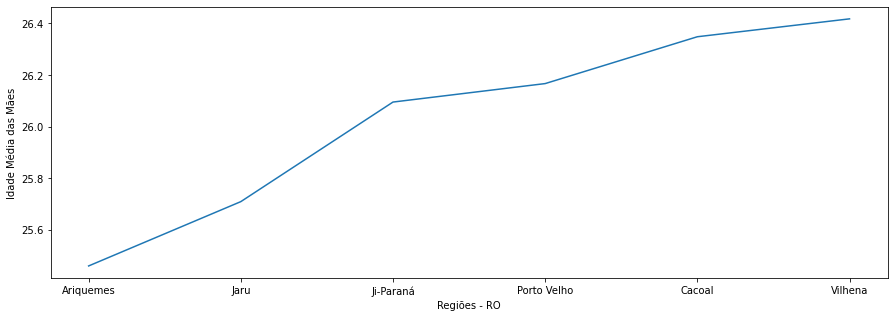

In [74]:
sinasc_3.groupby(imediatas)['IDADEMAE'].mean().sort_values().plot(figsize = [15,5])

plt.ylabel('Idade Média das Mães');
plt.xlabel('Regiões - RO');

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [75]:
idh = {
    'Porto Velho': 'IDH-M alto',
    'Vilhena': 'IDH-M alto',
    'Cacoal': 'IDH-M alto', 
    'Ji-Paraná': 'IDH-M alto',
    'Pimenta Bueno': 'IDH-M alto', 
    'Ariquemes': 'IDH-M alto', 
    'Rolim de Moura': 'IDH-M alto', 
    'Cerejeiras': 'IDH-M médio',
    'Jaru': 'IDH-M médio', 
    'Colorado do Oeste': 'IDH-M médio',
    'Ouro Preto do Oeste': 'IDH-M médio', 
    'Espigão d''Oeste': 'IDH-M médio',
    'Santa Luzia d''Oeste': 'IDH-M médio',
    'Pimenteiras do Oeste': 'IDH-M médio', 
    'Presidente Médici': 'IDH-M médio', 
    'Castanheiras': 'IDH-M médio', 
    'Guajará-Mirim': 'IDH-M médio', 
    'Chupinguaia': 'IDH-M médio', 
    'Cabixi': 'IDH-M médio',
    'Candeias do Jamari': 'IDH-M médio', 
    'São Felipe d''Oeste': 'IDH-M médio',
    'Cacaulândia': 'IDH-M médio',
    'São Miguel do Guaporé': 'IDH-M médio',
    'Mirante da Serra': 'IDH-M médio', 
    'Alvorada d''Oeste': 'IDH-M médio', 
    'Teixeirópolis': 'IDH-M médio', 
    'Nova Brasilândia d''Oeste': 'IDH-M médio',
    'Rio Crespo': 'IDH-M médio', 
    'Primavera de Rondônia': 'IDH-M médio', 
    'Alta Floresta d''Oeste': 'IDH-M médio', 
    'Ministro Andreazza': 'IDH-M médio', 
    'Novo Horizonte do Oeste': 'IDH-M médio', 
    'Vale do Paraíso': 'IDH-M médio', 
    'Alto Paraíso': 'IDH-M médio', 
    'Parecis': 'IDH-M médio', 
    'Buritis': 'IDH-M médio', 
    'Itapuã do Oeste': 'IDH-M médio',
    'Corumbiara': 'IDH-M médio', 
    'Cujubim': 'IDH-M médio', 
    'Costa Marques': 'IDH-M médio',
    'São Francisco do Guaporé': 'IDH-M médio', 
    'Urupá': 'IDH-M médio', 
    'Monte Negro': 'IDH-M médio', 
    'Seringueiras': 'IDH-M baixo',
    'Governador Jorge Teixeira': 'IDH-M baixo', 
    'Machadinho d''Oeste': 'IDH-M baixo', 
    'Campo Novo de Rondônia': 'IDH-M baixo',
    'Alto Alegre dos Parecis': 'IDH-M baixo', 
    'Theobroma': 'IDH-M baixo', 
    'Nova União': 'IDH-M baixo', 
    'Nova Mamoré': 'IDH-M baixo', 
    'Vale do Anari': 'IDH-M baixo'
}

In [97]:
sinasc_3.groupby(idh)['IDADEMAE'].mean().sort_values()

munResNome
IDH-M baixo    25.269231
IDH-M médio    25.848191
IDH-M alto     26.280332
Name: IDADEMAE, dtype: float64

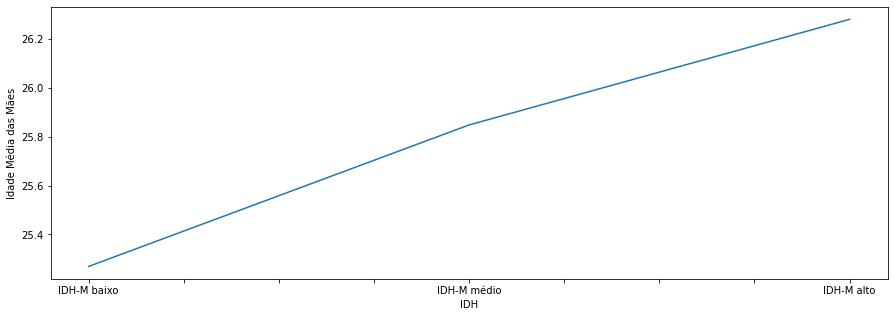

In [119]:
sinasc_3.groupby(idh)['IDADEMAE'].mean().sort_values().plot(figsize=[15,5])
plt.ylabel('Idade Média das Mães')
plt.xlabel('IDH');

Podemos ver que a idade média das mães é quase 1 ano maior em municípios de IDH alto se comparado com os municípios de IDH baixo, tendo o os municipíos de IDH médio entre ambos.

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [79]:
ifdm = {
    'Ariquemes': 'Desenvolvimento moderado',
    'Vilhena': 'Desenvolvimento moderado',
    'Pimenta Bueno': 'Desenvolvimento moderado',
    'Porto Velho': 'Desenvolvimento moderado',
    'Ji-Paraná': 'Desenvolvimento moderado', 
    'Cacoal': 'Desenvolvimento moderado',
    'Santa Luzia d''Oeste': 'Desenvolvimento moderado',
    'Rolim de Moura': 'Desenvolvimento moderado', 
    'Chupinguaia': 'Desenvolvimento moderado', 
    'São Miguel do Guaporé': 'Desenvolvimento moderado',
    'Pimenteiras do Oeste': 'Desenvolvimento moderado',
    'Teixeirópolis': 'Desenvolvimento moderado',
    'Colorado do Oeste': 'Desenvolvimento moderado', 
    'Jaru': 'Desenvolvimento moderado',
    'Rio Crespo': 'Desenvolvimento moderado',
    'Primavera de Rondônia': 'Desenvolvimento moderado',
    'Alta Floresta d''Oeste': 'Desenvolvimento moderado', 
    'Ouro Preto do Oeste': 'Desenvolvimento moderado',
    'São Francisco do Guaporé': 'Desenvolvimento moderado',
    'Candeias do Jamari': 'Desenvolvimento moderado',
    'Buritis': 'Desenvolvimento moderado', 
    'São Felipe d''Oeste': 'Desenvolvimento moderado', 
    'Presidente Médici': 'Desenvolvimento moderado',
    'Cerejeiras': 'Desenvolvimento moderado', 
    'Monte Negro': 'Desenvolvimento moderado',
    'Urupá': 'Desenvolvimento moderado', 
    'Espigão d''Oeste': 'Desenvolvimento regular', 
    'Seringueiras': 'Desenvolvimento regular', 
    'Alvorada d''Oeste': 'Desenvolvimento regular',
    'Itapuã do Oeste': 'Desenvolvimento regular',
    'Cabixi': 'Desenvolvimento regular',
    'Novo Horizonte do Oeste': 'Desenvolvimento regular',
    'Nova Brasilândia d''Oeste': 'Desenvolvimento regular', 
    'Vale do Paraíso': 'Desenvolvimento regular', 
    'Corumbiara': 'Desenvolvimento regular', 
    'Alto Paraíso': 'Desenvolvimento regular', 
    'Cacaulândia': 'Desenvolvimento regular', 
    'Vale do Anari': 'Desenvolvimento regular',
    'Ministro Andreazza': 'Desenvolvimento regular',
    'Costa Marques': 'Desenvolvimento regular',
    'Nova União': 'Desenvolvimento regular',
    'Guajará-Mirim': 'Desenvolvimento regular',
    'Mirante da Serra': 'Desenvolvimento regular',
    'Parecis': 'Desenvolvimento regular',
    'Castanheiras': 'Desenvolvimento regular',
    'Theobroma': 'Desenvolvimento regular', 
    'Machadinho d''Oeste': 'Desenvolvimento regular', 
    'Campo Novo de Rondônia': 'Desenvolvimento regular',
    'Nova Mamoré': 'Desenvolvimento regular', 
    'Cujubim': 'Desenvolvimento regular',
    'Alto Alegre dos Parecis': 'Desenvolvimento regular',
    'Governador Jorge Teixeira': 'Desenvolvimento regular'
}

In [108]:
sinasc_3.groupby(ifdm)['IDADEMAE'].mean().sort_values()

munResNome
Desenvolvimento regular     25.412005
Desenvolvimento moderado    26.226921
Name: IDADEMAE, dtype: float64

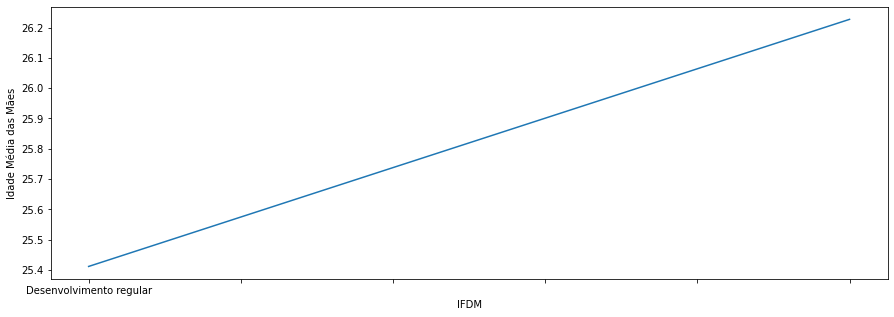

In [113]:
sinasc_3.groupby(ifdm)['IDADEMAE'].mean().sort_values().plot(figsize=[15,5])
plt.ylabel('Idade Média das Mães')
plt.xlabel('IFDM');

Similarmente com o IDH, a diferença entre o desenvolvimento regular e o moderado é de quase 1 ano na média de idade das mães.

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [112]:
pib = {
    'Porto Velho': 'Acima de 1 Bilhão', 
    'Ji-Paraná': 'Acima de 1 Bilhão', 
    'Vilhena': 'Acima de 1 Bilhão',
    'Ariquemes': 'Acima de 1 Bilhão', 
    'Cacoal': 'Acima de 1 Bilhão', 
    'Jaru': 'Acima de 1 Bilhão', 
    'Rolim de Moura': 'Acima de 1 Bilhão',
    'Pimenta Bueno': 'Acima de 1 Bilhão', 
    'Guajará-Mirim': 'Acima de 500 Milhões', 
    'Ouro Preto do Oeste': 'Acima de 500 Milhões',
    'Buritis': 'Acima de 500 Milhões', 
    'Machadinho d''Oeste': 'Acima de 500 Milhões', 
    'Espigão d''Oeste': 'Acima de 500 Milhões', 
    'São Miguel do Guaporé': 'Acima de 500 Milhões', 
    'Candeias do Jamari': 'Acima de 500 Milhões',
    'Nova Mamoré': 'Acima de 500 Milhões', 
    'Cerejeiras': 'Acima de 500 Milhões', 
    'Alta Floresta d''Oeste': 'Acima de 300 Milhões',
    'Presidente Médici': 'Acima de 300 Milhões', 
    'Cujubim': 'Acima de 300 Milhões', 
    'Nova Brasilândia d''Oeste': 'Acima de 300 Milhões', 
    'Alto Paraíso': 'Acima de 300 Milhões', 
    'São Francisco do Guaporé': 'Acima de 300 Milhões', 
    'Colorado do Oeste': 'Acima de 300 Milhões',
    'Monte Negro': 'Acima de 200 Milhões', 
    'Alto Alegre dos Parecis': 'Acima de 200 Milhões', 
    'Campo Novo de Rondônia': 'Acima de 200 Milhões', 
    'Alvorada d''Oeste': 'Acima de 200 Milhões', 
    'Chupinguaia': 'Acima de 100 Milhões',
    'Corumbiara': 'Acima de 100 Milhões',
    'Ministro Andreazza': 'Acima de 100 Milhões',
    'Urupá': 'Acima de 100 Milhões',
    'Costa Marques': 'Acima de 100 Milhões',
    'Seringueiras': 'Acima de 100 Milhões', 
    'Mirante da Serra': 'Acima de 100 Milhões',
    'Governador Jorge Teixeira': 'Acima de 100 Milhões',
    'Theobroma': 'Acima de 100 Milhões', 
    'Santa Luzia d''Oeste': 'Acima de 100 Milhões',
    'Novo Horizonte do Oeste': 'Acima de 100 Milhões',
    'Itapuã do Oeste': 'Acima de 100 Milhões',
    'Vale do Paraíso': 'Acima de 100 Milhões', 
    'Cacaulândia': 'Acima de 100 Milhões',
    'Cabixi': 'Acima de 100 Milhões', 
    'Vale do Anari': 'Acima de 100 Milhões', 
    'Nova União': 'Até 100 Milhões',
    'Parecis': 'Até 100 Milhões', 
    'Rio Crespo': 'Até 100 Milhões',
    'Pimenteiras do Oeste': 'Até 100 Milhões',
    'Teixeirópolis': 'Até 100 Milhões',
    'São Felipe d''Oeste': 'Até 100 Milhões',
    'Castanheiras': 'Até 100 Milhões',
    'Primavera de Rondônia': 'Até 100 Milhões'
}

In [114]:
sinasc_3.groupby(pib)['IDADEMAE'].mean().sort_values()

munResNome
Acima de 200 Milhões    25.146435
Acima de 100 Milhões    25.638424
Acima de 300 Milhões    25.706070
Acima de 500 Milhões    25.785927
Acima de 1 Bilhão       26.265562
Até 100 Milhões         26.519894
Name: IDADEMAE, dtype: float64

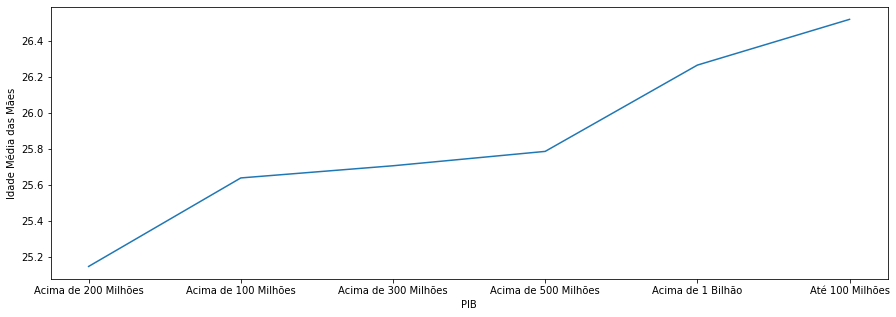

In [118]:
sinasc_3.groupby(pib)['IDADEMAE'].mean().sort_values().plot(figsize = [15,5])

plt.ylabel('Idade Média das Mães')
plt.xlabel('PIB');

Aqui vemos que o PIB não foi determinante pra uma mundança levemente significativa, visto que a maior idade média ficou entre os municípios com menor PIB.

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

A idade média das mães não teve uma diferença grande entre faixas de IDH, área, latitude ou PIB. Isso nem mesmo impactou as semanas de gestação, visto que em áreas com maior desenvolvimento a média poderia ser maior por possuírem maiores opções para tal. 